# Introduction

Investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens. Create an article with visualizations on the analysis

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Prep Data

Load the datasets into DataFrames so they can be visualized.


In [3]:
#path = '/content/drive/MyDrive/Colab Notebooks/Life Expectancy and GDP Data/all_data.csv'

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Life Expectancy and GDP Data/all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Examine Data

Learn more about the data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,96.0,2.007500e+03,4.633971e+00,2.000000e+03,2.003750e+03,2.007500e+03,2.011250e+03,2.015000e+03
Life expectancy at birth (years),96.0,7.278958e+01,1.067288e+01,4.430000e+01,7.447500e+01,7.675000e+01,7.890000e+01,8.100000e+01
GDP,96.0,3.880499e+12,5.197561e+12,4.415703e+09,1.733018e+11,1.280220e+12,4.067510e+12,1.810000e+13


What countries are represented in the data?

In [6]:
def get_unique_contries(countries):
    unique = []
    for country in countries:
        if country not in unique:
            unique.append(country)
    return unique

countries = df['Country']

print(get_unique_contries (countries))


['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


What years are represented in the data?

In [7]:
def get_unique_years(years):
    unique = []
    for year in years:
        if year not in unique:
            unique.append(year)
    return unique

years = df['Year']

print(get_unique_years(years))

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


## Update DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [8]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.


In [18]:
df= df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})

In [19]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 

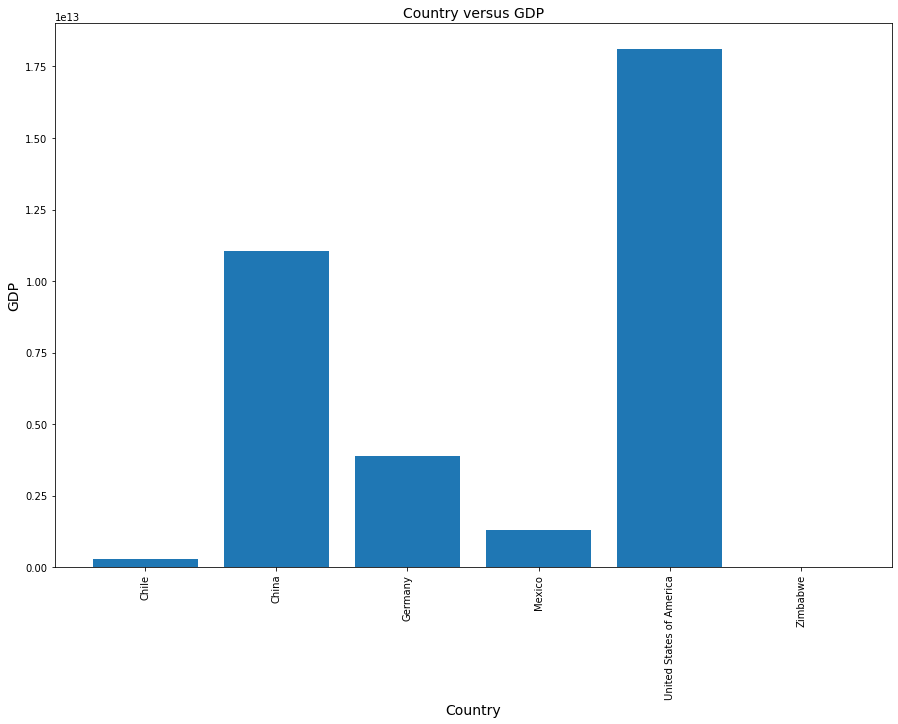

In [59]:
fig = plt.subplots(figsize=(15, 10)) 

plt.bar(df['Country'], df['GDP'])
plt.title('Country versus GDP', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(rotation='vertical')
plt.ylabel('GDP', fontsize=14)
plt.grid(False)
plt.show()


B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.

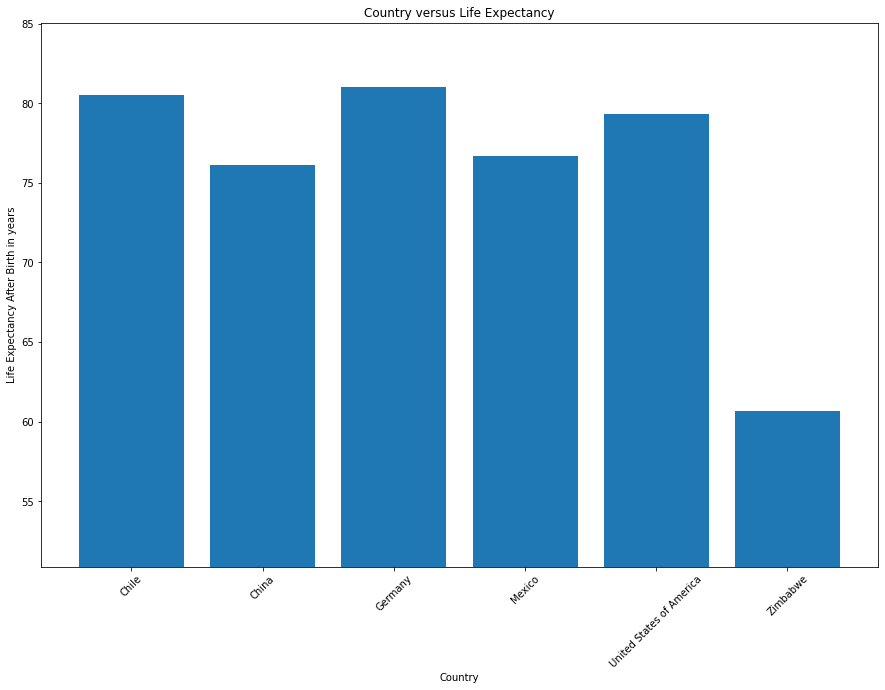

In [60]:
fig = plt.subplots(figsize=(15, 10)) 

plt.bar(df['Country'], df['LEABY'])
plt.title('Country versus Life Expectancy')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Life Expectancy After Birth in years')
plt.ylim(50.90)

plt.show()

**Observations:**

- USA has the highest GDP but the life expectancy of its citiezns is similar to those are in Chile and Germany
- Chileans have one of the highest life expectancy despite Chile's low GDP.
- Zimbabwe has the lowsest GDP and life expectancy 

## Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.
Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 


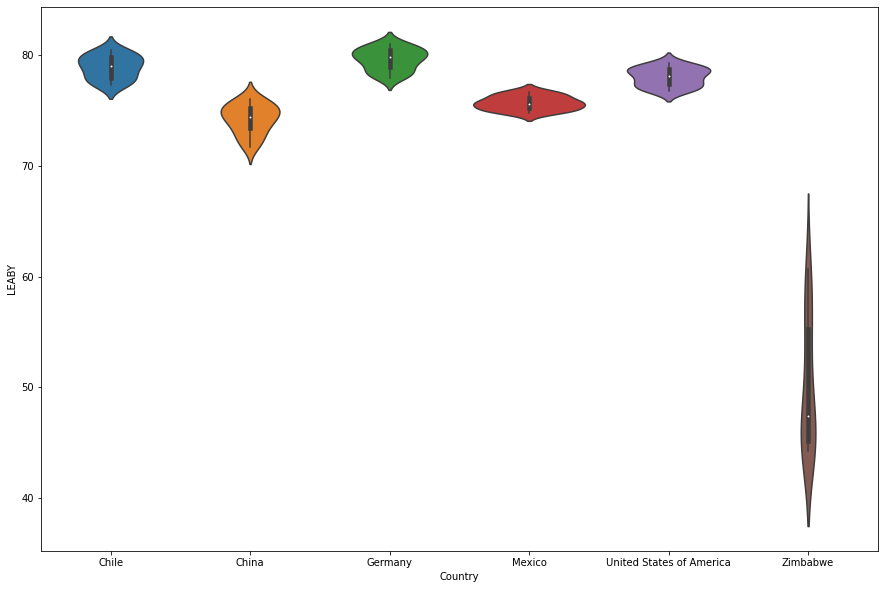

<Figure size 432x288 with 0 Axes>

In [77]:
fig = plt.subplots(figsize=(15, 10)) 
sns.violinplot(y=df['LEABY'], x=df['Country'], data=df)
plt.show()

plt.savefig("violinplot_LEABY.png")

##Bar Plots Of GDP and Life Expectancy over time

Plot the progession of GDP's over the years by country in a barplot using Seaborn. Set up a figure with the correct dimensions for your plot.

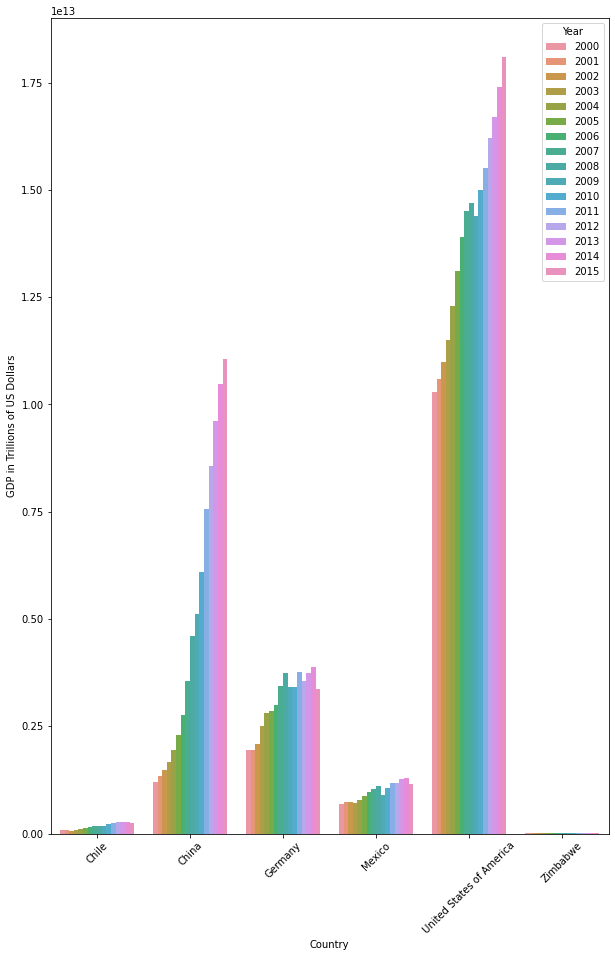

<Figure size 432x288 with 0 Axes>

In [78]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x=df['Country'], y=df['GDP'], hue=df['Year'], data=df)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of US Dollars')

plt.show()

plt.savefig("barplot_GDP_overTime.png")

Plot barplot that clusters Life Expectancy over time by Country.

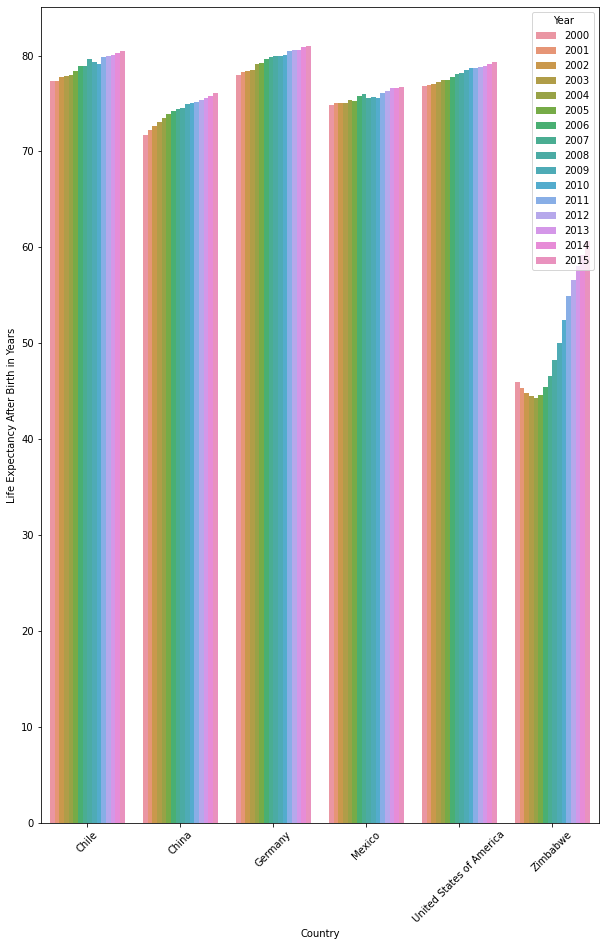

In [62]:
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x=df['Country'], y=df['LEABY'], hue=df['Year'], data=df)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Life Expectancy After Birth in Years')

plt.show()

**Observations:**

- China has the highest rate of GDP increase over time, with biggest changes in 2009 and 2010. 
- GDP of Zimbabwe remained exceeding low between 2000 and 2015.
- Overall, GDP and life expectancy have increased over time, with the expection where the life expectancy in Zimbabwe decreased between 2000 and 2005.
- There might be a correlation between GDP and life expectancy, however, Zimbabwe might be an outlier in this dataset.

## Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


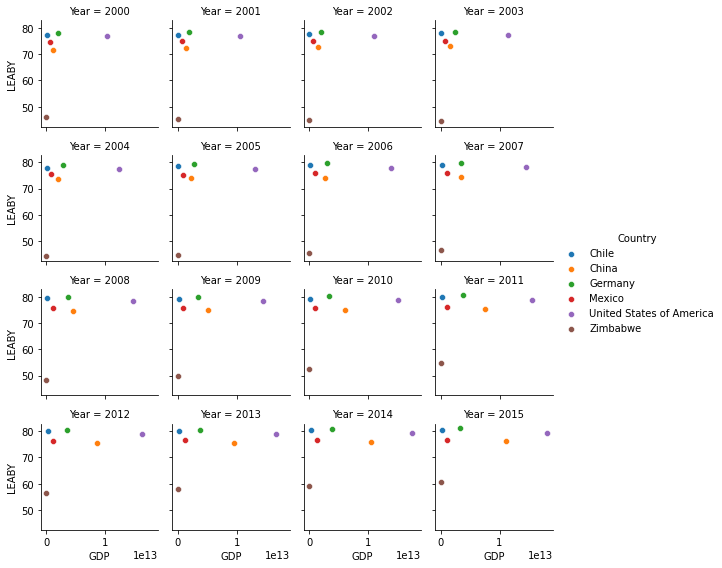

In [72]:
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, height=2)
g.map(sns.scatterplot, 'GDP', 'LEABY', edgecolor="w").add_legend()

plt.show()


**Observations:**
- China moves the most along the X axis (GDP) over the years
- Zimbabwe moves the most along the Y axis (Life Expectancy) over the years.

## Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 


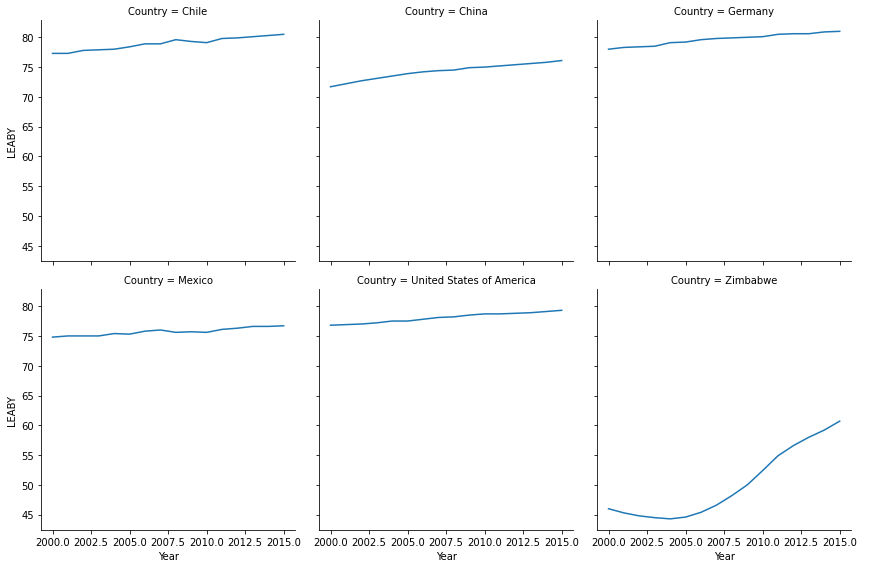

In [74]:
g3 = sns.FacetGrid(df, col='Country', col_wrap=3, height=4)
g3.map(plt.plot, 'Year', 'LEABY').add_legend()

plt.show()

##Line Plots for GDP

Instead of Life Expectancy on the Y axis, use GDP in FaceGrid.


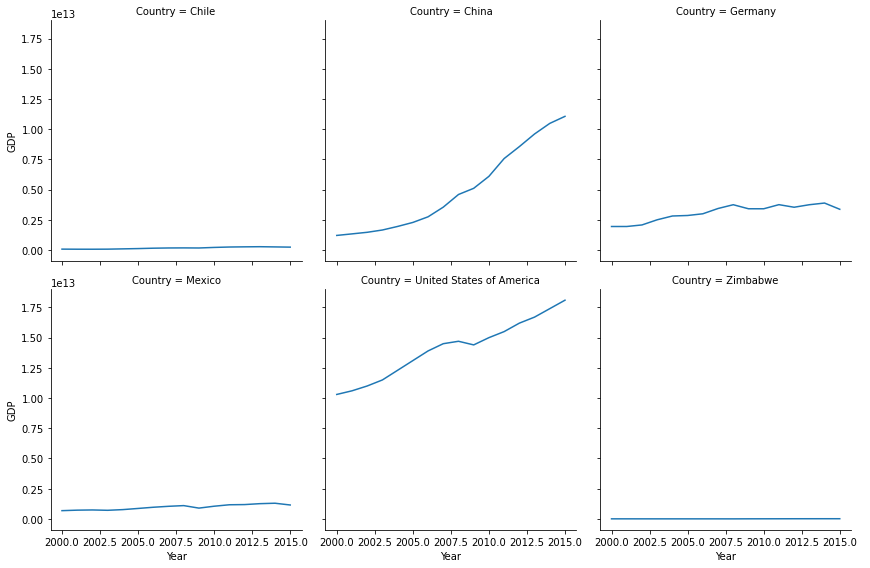

<Figure size 432x288 with 0 Axes>

In [79]:
g4 = sns.FacetGrid(df, col='Country', col_wrap=3, height=4)
g4.map(plt.plot, 'Year', 'GDP').add_legend()

plt.show()

plt.savefig("lineplot_GDP.png")

**Observations:**
- Chile and Zimbabwe have the lowest GDP.
- Unlike Zimbabwe, where the life expectancy is the lowest, Chile is the among the countries with highest life expectancy.
- US has the highest GDP both in growth and value, but its life expectancy increased rather slowly over the years.

## Researching Data Context 

GDP in China increased drastically between 2005 and 2015 due to the rapid growth in manufacutring and exporting goods.